In [1]:
##Use decision trees to prepare a model on fraud data 
##treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [2]:
###importing some lab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
## importing data set
check=pd.read_csv("C:/Users/Vijay Rathod/Downloads/Fraud_check.csv")
check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
check.shape

(600, 6)

In [6]:
### EDA
check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
# Changing the categorical columns into numeric one 
check1 = pd.get_dummies(check)
check1.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0


In [12]:
#Applying the Risky and Good category to each data point as defined in the problem statement
#-> taxable_income <= 30000 as "Risky" and others are "Good"
check1['Category'] = pd.cut(check1['Taxable.Income'], 
                        bins=[0,30000, np.inf], 
                        labels=['Risky','Good'],
                        include_lowest=True)
check1.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Category
0,68833,50047,10,1,0,0,0,1,0,1,Good
1,33700,134075,18,0,1,1,0,0,0,1,Good
2,36925,160205,30,1,0,0,1,0,0,1,Good
3,50190,193264,15,0,1,0,0,1,0,1,Good
4,81002,27533,28,1,0,0,1,0,1,0,Good


In [13]:
# So the applied category here is Y variable and rest all are X variables, hence applying the LableEncoding to Y
label_encoder = preprocessing.LabelEncoder()
check1['Category']= label_encoder.fit_transform(check1['Category']) 

In [15]:
X=check1.iloc[:,1:10]
X

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [16]:
Y=check1.iloc[:,10]
Y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Category, Length: 600, dtype: int32

In [17]:
### Now spliting our data into training and testing data set
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=40)

In [35]:
### Buliding Descision tree usind Entropy
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

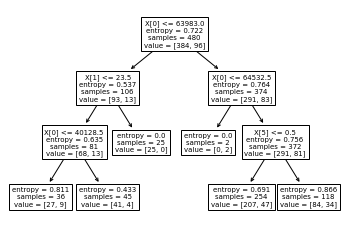

In [36]:
#### Ploting the Decision tree
tree.plot_tree(model);

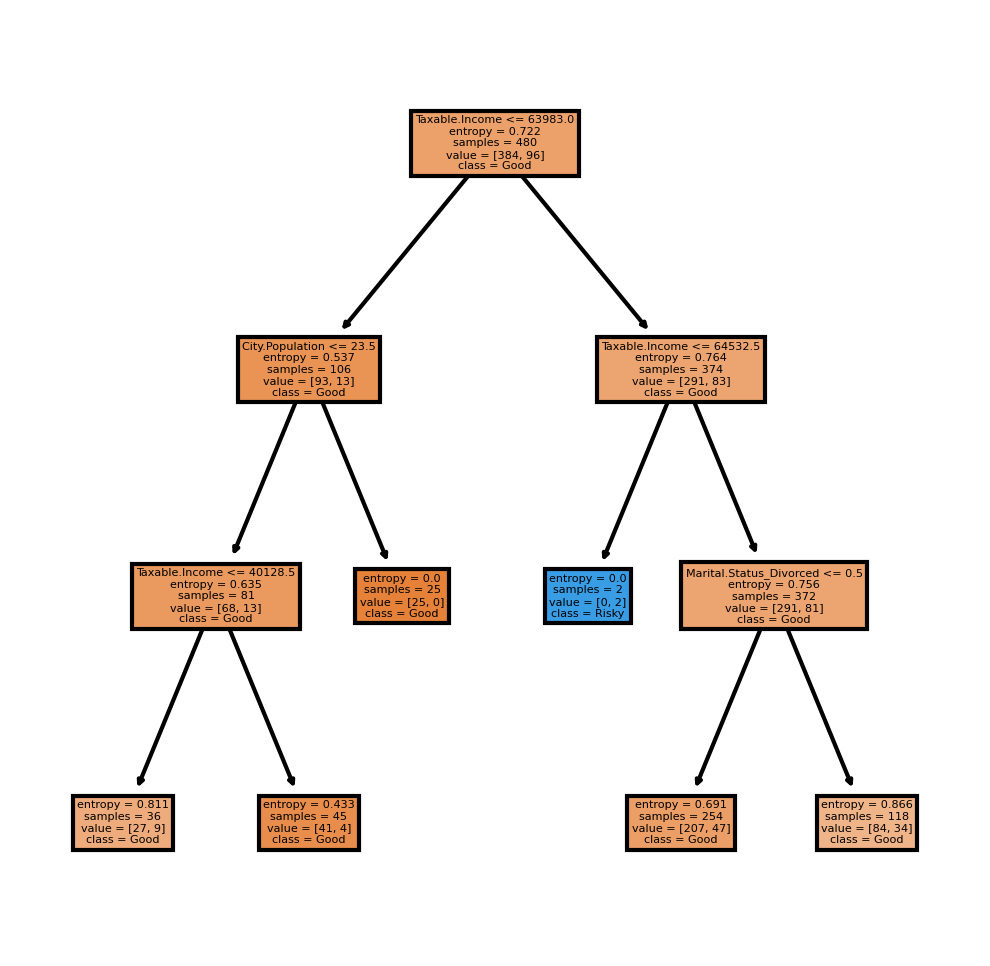

In [37]:
fn=['Taxable.Income','City.Population','Work.Experience','Undergrad_NO','Undergrad_YES','Marital.Status_Divorced',
    'Marital.Status_Married','Marital.Status_Single','Urban_NO','Urban_YES','Category']
cn=['Good', 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [38]:
### predicting on test data
preds=model.predict(x_test)
pd.Series(preds).value_counts()

0    120
dtype: int64

In [39]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [40]:
pd.crosstab(y_test,preds) ### 2way table

col_0,0
Category,
0,92
1,28


In [41]:
### Accuracy.
np.mean(preds==y_test)

0.7666666666666667

In [42]:
### CART

In [43]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [44]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

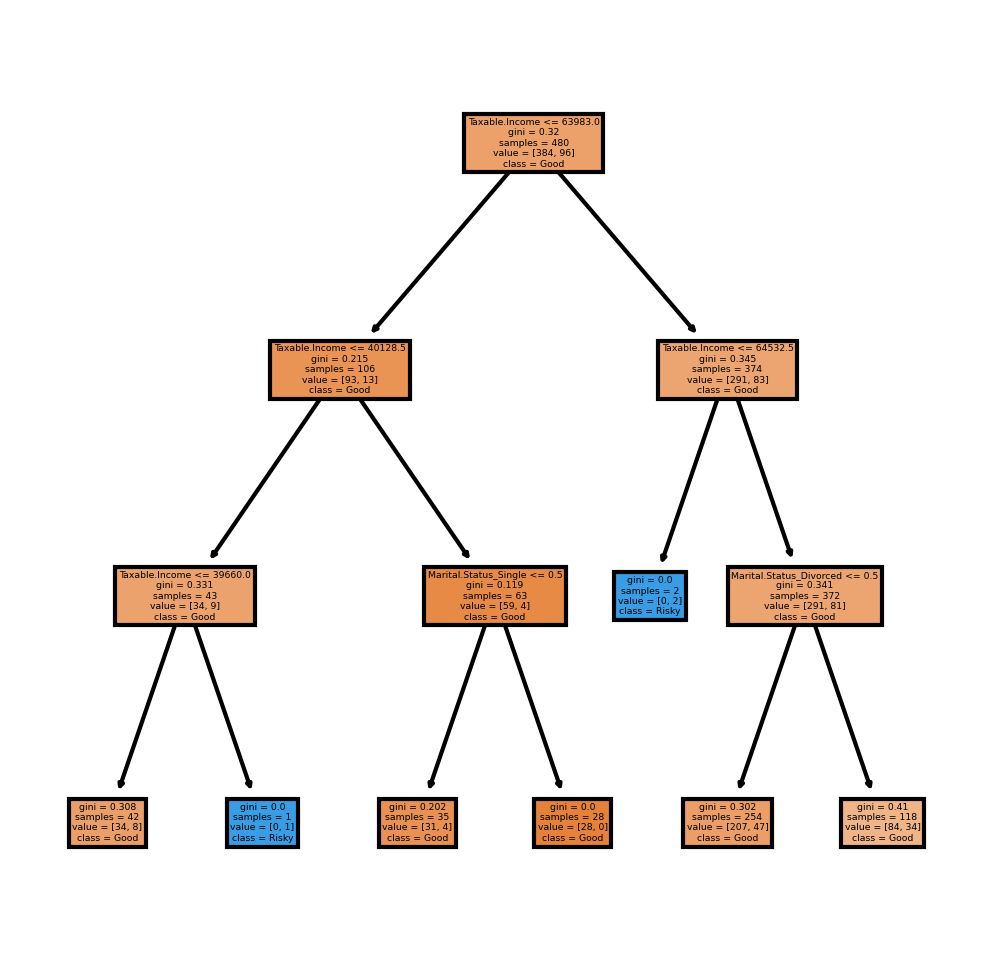

In [45]:
fn=['Taxable.Income','City.Population','Work.Experience','Undergrad_NO','Undergrad_YES','Marital.Status_Divorced',
    'Marital.Status_Married','Marital.Status_Single','Urban_NO','Urban_YES','Category']
cn=['Good', 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [46]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(preds==y_test)

0.7666666666666667